# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-2 | Date: September 29, 2023

In this week you will be implementing the convolution operation step-by-step NumPy. Once the basic step of convolution operation is implemented, we will use it to detection edges in gray scale images.

So lets get started!

## Task for this week:

1. Implement a single convolution step
2. Implement horizontal edge detection using Sobel filter
3. Implement vertical edge detection using Sobel filter
4. Implement Vetical and Horizontal edge detection using Prewitt filter
5. Examine the code to detect edges using TensorFLow!

# Edge Detection Using Convolutions


## Step-1 : Importing the packages

In [1]:
"""
Import NumPy, OpenCV, MatPlotLib, and TensorFlow libraries
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
# Connecting to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Changing to the working directory to access sample images
%cd /content/gdrive/MyDrive/42028Version2023/Week2
!ls

/content/gdrive/MyDrive/42028Version2023/Week2
new_image.png			Week2-Lab2-EdgeDetection-Solution.ipynb
NumPy-WarmUp.ipynb		Week2-Lab2-MachineLearning.ipynb
Week2-Lab2-EdgeDetection.ipynb	Week2-Lab2-MachineLearning-Solution.ipynb


## Step-2: Implement a single step of Convolution operation

You will have to apply a filter to a single position of the input image and calculate the output value after convolutions

**Convolutions operation recap:**

<img src='http://drive.google.com/uc?export=view&id=1Hz3KaV9D4hT6H3XsGwJvGKwPiUzkasPu' alt='Conv'>




**Task-1:** Implement the *single_step_convolution()* function: [Hint](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html)




In [4]:
def single_step_convolution(slice, filter):
    """
    Apply a filter defined by parameter 'filter' on a single slice (slice) of the input image.

    Arguments:
    slice --> slice of the input image of shape (f, f), where is the filter size
    filter --> Weight parameters contained in a window - matrix of shape (f, f)

    Returns:
    cval -- a scalar value, result of convolving the sliding window (filter) on a slice X of the input image
    """

    ### Write Your Code Here ### (~ 2 lines of code)
    # Element-wise product between slice and filter.

    s = slice * filter

    # Sum over all entries of the volume s.
    cval = np.sum(s)

    ### END CODE HERE ###

    return cval

In [5]:
image_slice= np.array([[10, 10, 0], [10, 10, 0], [10, 10, 0]])
filter = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

print(image_slice)
print(filter)

result= single_step_convolution(image_slice, filter)
print("Result =", result)

[[10 10  0]
 [10 10  0]
 [10 10  0]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Result = 30


**Expected Output :**  Result  = 30

## Step-3: Implement the full Convolution operation on the whole image

**Task-2** : Implement the function *detect_edge()* give below to convolve the *filter* with a *image*. The function takes *image* and *filter* as input paramenters and returns the *detection_result* which is the result of the convolution operation the whole *image* and is also the edge detection result!

**Hint:**
1. To select a slice for size 3X3 from the upper left corner of a 2D *image* you will do the following:

       slice = image[0:3, 0:3]
2. To define a slice, you will have to define the ***row_start, row_end, col_start and col_end***. The figure given below may be of help!

<img src='http://drive.google.com/uc?export=view&id=1-LJz7chAFay0qMiAsK4Qwvo-cmgp71Hn' alt='slice'>


3.  Formulas on how to find the shape of the convolution output (with stride=1 and padding=0) to the input image shape are:

$$ O_{Ht} = I_{Ht} - f  +1 $$
$$ O_{Wd} = I_{Wd} - f  +1 $$

Where,


$$ O_{Ht}, O_{Wd} \text{ are the number of rows and columns in the output matrix, respectively.} $$

$$ I_{Ht}, I_{Wd} \text{ are the number of rows and columns in the input image, respectively.} $$

$$ f \text{ is the filter size (assuming it is a square matrix)}$$


Don't worry about the meaning of *stride* and *padding* at the moment! we will cover it in details later.

In [6]:
def detect_edge(image, filter):
  """
  Slice the image based on the filter size and apply convolution operation on each slice and return
  the convolution result matrix.

  Argumnets:
  image --> The input image of size (n, m) (gray scale image)
  filter --> It is the kernel to be used for the convolution operation

  Returns:
  CResult --> The result matrix after convolution operation which will detect edges in an image
  """

  ### START YOUR CODE HERE ###
  # Retrieve the dimension of the image(≈1 lines)
  (image_row, image_col) = np.shape(image)

  #  Retrieve the dimension of the filter(≈1 lins)
  (filter_row, filter_col) = np.shape(filter) # assuming the filter is square matrix

  padding = 0
  stride = 1

  # Calculate the output matrix shape using the above formula (≈2 lines)
  Ht = image_row-filter_row+1
  Wd = image_col-filter_row+1


  # Initialize the output marixe with zeros (≈1 line)
  detection_result = np.zeros(shape=(Ht, Wd))

  # Divide the image into slices and perform convolution operation
  for H in range(Ht):
    for W in range(Wd):
      # Find the corners of the current "slice" (≈4 lines)
      row_start = H*stride
      row_end = row_start+filter_row
      col_start = W*stride
      col_end = col_start+filter_row

      # Use the corners to define the image slice for convolution (≈1 line)
      slice = image[row_start:row_end, col_start:col_end]

      # Call the single_step_convolution() which you have implemented above
      # and pass image and filter as argument (≈1 lines)
      detection_result[H, W] = single_step_convolution(slice, filter)

      ### END CODE HERE ###

  return detection_result

### Sobel and Prewitt filter recap:


  <img src='http://drive.google.com/uc?export=view&id=1l80N7GmGPqy8tkk718Y-MV_s1fDIJ0u7' alt='Prewitt'>
  
  <img src='http://drive.google.com/uc?export=view&id=14cVc5WPwNqScoa1_-qITKoABCpx8Wtw_' alt='Sobel'>
  

### Example: Detecting Horizontal edges with Sobel filter

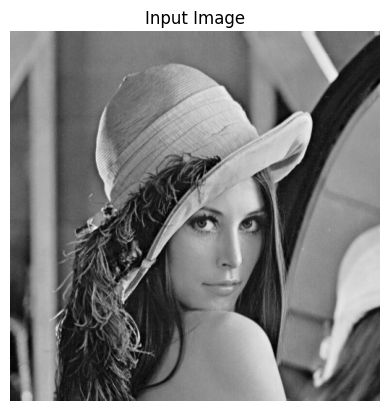

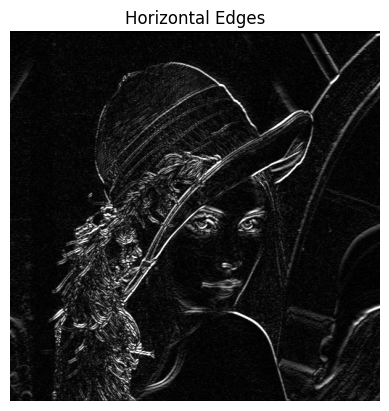

In [7]:
## CODE FOR TESTING: PLEASE DO NOT MODIFY ##
## Read an image and display
input_image = cv2.imread('new_image.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale
plt.axis('off')
plt.title("Input Image")
plt.show()

# Create a Sobel horizontal edge detection filter matrix
Hfilter = np.asarray([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

# Perform convolution operation using the detect_edge() function and the display the result
Hedges = detect_edge(input_image, Hfilter)
gX = cv2.convertScaleAbs(Hedges)
plt.imshow(gX, cmap='gray')
plt.axis('off')
plt.title("Horizontal Edges")
plt.show()

## Complete the below code for Vertical edge filter

**Task-3:** Implement the Vertical Sobel edge detection filter

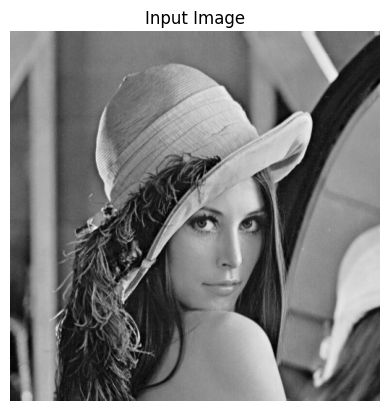

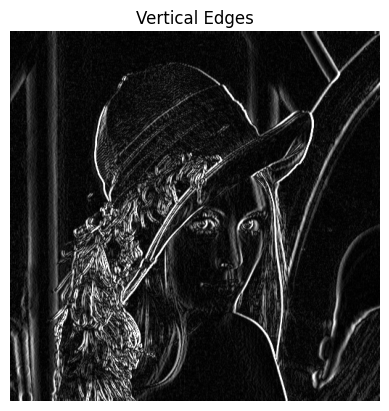

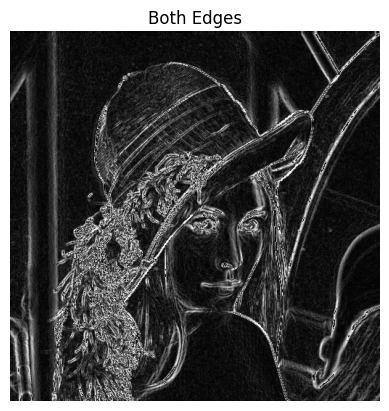

In [8]:
## START YOUR CODE FROM HERE ##
## Read an image and display (≈ 5 lines)
input_image = cv2.imread('new_image.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale
plt.axis('off')
plt.title("Input Image")
plt.show()

# Create a horizontal filter matrix (≈ 1 line)
Vfilter = np.asarray([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

### END CODE HERE ###

# Perform convolution operation using the detect_edge() function and the display the result (≈ 5 lines)
Vedges = detect_edge(input_image, Vfilter)
gY = cv2.convertScaleAbs(Vedges)
plt.imshow(gY, cmap='gray')
plt.axis('off')
plt.title("Vertical Edges")
plt.show()

# Adding the vertical and horizontal edge and displaying the result
gXY = cv2.convertScaleAbs(gX+gY)
plt.imshow(gXY, cmap='gray')
plt.axis('off')
plt.title("Both Edges")
plt.show()

## Implement the vertical and horizontal edge detection using Prewitt filter

**Task-4:** Implement the Prewitt filters for Horizontal and Vertical edges

Complete the below code:

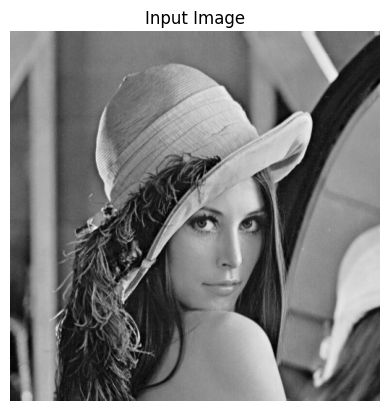

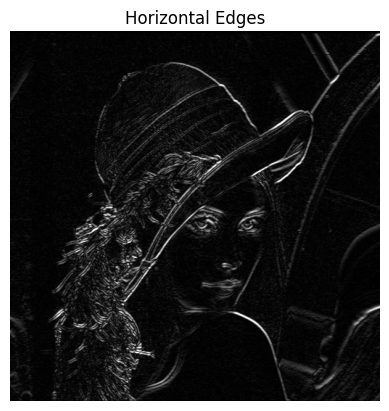

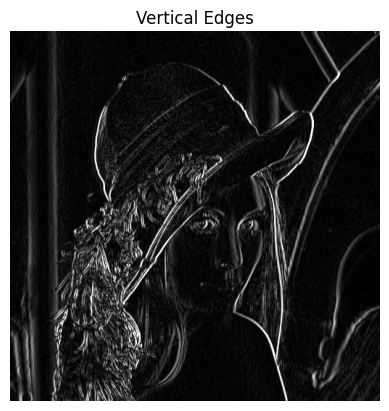

In [9]:
## START YOUR CODE FROM HERE ##
## Read an image and display (≈ 5 lines)
input_image = cv2.imread('new_image.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale
plt.axis('off')
plt.title("Input Image")
plt.show()

# Create Prewitt horizontal filter matrix (≈ 1 line)
Hfilter = np.asarray([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

# Create Prewitt Vertical filter matrix (≈ 1 line)
Vfilter = np.asarray([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

### END CODE HERE ###

# Perform convolution operation using the detect_edge() function and the display the result
Hedges = detect_edge(input_image, Hfilter)
gX = cv2.convertScaleAbs(Hedges)
plt.imshow(gX, cmap='gray')
plt.axis('off')
plt.title("Horizontal Edges")
plt.show()

# Perform convolution operation using the detect_edge() function and the display the result (≈ 5 lines)
Vedges = detect_edge(input_image, Vfilter)
gY = cv2.convertScaleAbs(Vedges)
plt.imshow(gY, cmap='gray')
plt.axis('off')
plt.title("Vertical Edges")
plt.show()


# Convolutions Using Tensoflow

The TensorFlow function for convolutions is **conv2d**:

### Syntax:

***tf.nn.conv2d(***
    **input**,
    **filter**,
    **strides**,
    **padding**,
    use_cudnn_on_gpu=True,
    data_format='NHWC',
    dilations=[1, 1, 1, 1],
    name=None
**)**


**Hint:**
Use ***numpy*** array to create the filter for Sobel edges.

1/1 [==============================] - 0s 104ms/step


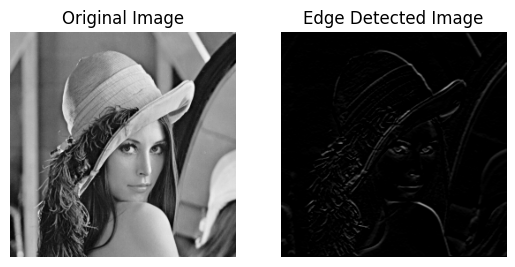

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load and preprocess an image (replace 'image_path' with your image file)
image_path = 'new_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
image = cv2.resize(image, (256, 256))  # Resize for consistent input size
image = image / 255.0  # Normalize pixel values to [0, 1]

# Reshape the image to match the input shape expected by the model
image = np.expand_dims(image, axis=(0, -1))  # Add batch and channel dimensions

# Define a simple edge detection model
model = tf.keras.Sequential([
    #Conv2D(1, (3, 3), input_shape=(256, 256, 1), padding='same')
    Conv2D(1, (3, 3), activation='relu', input_shape=(256, 256, 1), padding='same')
])


# Define an edge detection filter (Sobel filter)
sobel_filter = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

# Set the model's weights to the Sobel filter
model.layers[0].set_weights([np.expand_dims(np.expand_dims(sobel_filter, axis=-1), axis=-1), np.array([0.0])])

# Perform edge detection on the image
edge_detected = model.predict(image)

# Plot the original image and the edge-detected image
plt.subplot(121)
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edge_detected[0, :, :, 0], cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.show()


## Congratulations on completing this tasks!
You now understand how to detect edges from scratch and how convolutions works